In [142]:
import pandas as pd
import numpy as np
import yfinance as yf

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import warnings

warnings.simplefilter('ignore')
# PATH_TO_STOCK = 'data/SSE50.csv'

In [87]:
# get china stock symbols 

from time import sleep
from random import randint
from bs4 import BeautifulSoup
from requests import Request
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
from webdriver_manager.chrome import ChromeDriverManager


class Spider:

    def __init__(self, login_url='https://finance.yahoo.com/most-active'):
        print('init webdriver...')
        option = None
        option = webdriver.ChromeOptions()
        self.driver = webdriver.Chrome(executable_path=ChromeDriverManager().install(), options=option)
        self.driver.get(login_url)
        print('webdriver initiated!')
    

In [ ]:
# после открытия окна хрома нужно мануально проставить рынок China!

spider = Spider()
print('Выбрали China в автоматически открывшемся окне? Yes/No')
ans = input()
if ans.lower() != 'yes':
    raise 'Try Again'
else: 
    print('You can run next cell!')

In [76]:
payload=pd.read_html(spider.driver.page_source)
table_0 = payload[0]
df = table_0

for i in tqdm(range(100)):
    spider.driver.find_elements_by_xpath('//*[@id="scr-res-table"]/div[2]/button[3]')[0].click()
    payload=pd.read_html(spider.driver.page_source)
    table_0 = payload[0]
    tmp_df = table_0
    df = df.append(tmp_df)
    time.sleep(randint(2,7) / 1.32)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [05:55<00:00,  3.56s/it]


In [154]:
df.to_excel('data/china_stocks.xlsx')
df = df.drop_duplicates(['Symbol'])
symbols = list(df['Symbol'])
len(symbols)

2500

---

In [156]:
# get stock actives history by symbols

def get_descriptive_statistics(frame):
    E = np.mean(frame["log_return"])
    sigma = np.std(frame["log_return"])
    frame['E'] = E
    frame['Sigma'] = sigma
    return frame, E, sigma

def get_return(frame):
    frame['return'] = frame['Close'] / frame['Close'].shift(1)
    frame['log_return'] = np.log(frame['return'])
    return frame

stocks = {}
stocks_stat = pd.DataFrame(columns=['symbol',  'E', 'Sigma', 'mean_vol', 'mean_return', 'mean_log_return'])


for symbol in tqdm(symbols):
    stock = yf.download(symbol, start="2018-01-01", end="2018-12-31", progress=False)
    stock = get_return(stock)
    stock, E, Sigma = get_descriptive_statistics(stock)
    stocks_stat.loc[symbol] = [symbol,
                               E,
                               Sigma, 
                               stock['Volume'].mean(), 
                               stock['return'].mean(), 
                               stock['log_return'].mean()]
    stocks[symbol] = stock

  2%|█▉                                                                                                                  | 41/2500 [00:09<08:59,  4.56it/s]


1 Failed download:
- 601456.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


  3%|███▍                                                                                                                | 74/2500 [00:16<08:26,  4.79it/s]


1 Failed download:
- 688009.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


  6%|███████▏                                                                                                           | 157/2500 [00:35<07:59,  4.89it/s]


1 Failed download:
- 300821.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


  8%|████████▋                                                                                                          | 190/2500 [00:42<08:48,  4.37it/s]


1 Failed download:
- 688126.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


  9%|█████████▉                                                                                                         | 217/2500 [00:48<07:51,  4.84it/s]


1 Failed download:
- 688981.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


  9%|██████████▎                                                                                                        | 224/2500 [00:49<08:03,  4.71it/s]


1 Failed download:
- 601975.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 10%|███████████                                                                                                        | 241/2500 [00:54<07:44,  4.86it/s]


1 Failed download:
- 601916.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 10%|███████████▎                                                                                                       | 246/2500 [00:55<07:34,  4.96it/s]


1 Failed download:
- 300840.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 12%|█████████████▎                                                                                                     | 289/2500 [01:05<07:50,  4.70it/s]


1 Failed download:
- 002958.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 13%|███████████████▌                                                                                                   | 337/2500 [01:15<07:17,  4.94it/s]


1 Failed download:
- 601816.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 14%|███████████████▋                                                                                                   | 342/2500 [01:16<07:38,  4.70it/s]


1 Failed download:
- 601598.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 14%|███████████████▊                                                                                                   | 345/2500 [01:17<07:31,  4.77it/s]


1 Failed download:
- 688599.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 17%|███████████████████▏                                                                                               | 417/2500 [01:33<07:17,  4.76it/s]


1 Failed download:
- 003816.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 17%|████████████████████                                                                                               | 435/2500 [01:37<06:55,  4.97it/s]


1 Failed download:
- 300773.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 22%|█████████████████████████▊                                                                                         | 561/2500 [02:05<07:00,  4.61it/s]


1 Failed download:
- 601615.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 25%|█████████████████████████████▎                                                                                     | 637/2500 [02:23<07:58,  3.89it/s]


1 Failed download:
- 688396.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 26%|█████████████████████████████▊                                                                                     | 649/2500 [02:26<08:09,  3.78it/s]


1 Failed download:
- 300846.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 27%|███████████████████████████████                                                                                    | 675/2500 [02:32<06:12,  4.90it/s]


1 Failed download:
- 300797.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 29%|█████████████████████████████████                                                                                  | 718/2500 [02:42<06:53,  4.31it/s]


1 Failed download:
- 300847.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 33%|█████████████████████████████████████▊                                                                             | 821/2500 [03:05<06:06,  4.59it/s]


1 Failed download:
- 688165.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 33%|██████████████████████████████████████                                                                             | 827/2500 [03:07<05:49,  4.79it/s]


1 Failed download:
- 300831.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 33%|██████████████████████████████████████▏                                                                            | 831/2500 [03:08<05:42,  4.87it/s]


1 Failed download:
- 601658.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 35%|████████████████████████████████████████▋                                                                          | 884/2500 [03:20<05:51,  4.59it/s]


1 Failed download:
- 601696.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 35%|████████████████████████████████████████▊                                                                          | 886/2500 [03:20<05:43,  4.69it/s]


1 Failed download:
- 002969.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 36%|████████████████████████████████████████▉                                                                          | 889/2500 [03:21<05:40,  4.73it/s]


1 Failed download:
- 601865.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 37%|██████████████████████████████████████████▉                                                                        | 934/2500 [03:31<06:02,  4.32it/s]


1 Failed download:
- 688567.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 38%|███████████████████████████████████████████▊                                                                       | 953/2500 [03:35<05:18,  4.86it/s]


1 Failed download:
- 002966.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600

1 Failed download:
- 600968.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 38%|████████████████████████████████████████████                                                                       | 958/2500 [03:36<05:49,  4.41it/s]


1 Failed download:
- 601778.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 40%|█████████████████████████████████████████████▋                                                                    | 1002/2500 [03:46<05:13,  4.78it/s]


1 Failed download:
- 300857.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 43%|████████████████████████████████████████████████▉                                                                 | 1073/2500 [04:02<04:58,  4.79it/s]


1 Failed download:
- 002948.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 43%|█████████████████████████████████████████████████                                                                 | 1076/2500 [04:03<04:57,  4.79it/s]


1 Failed download:
- 600989.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 46%|████████████████████████████████████████████████████▉                                                             | 1162/2500 [04:22<05:16,  4.23it/s]


1 Failed download:
- 601860.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 50%|████████████████████████████████████████████████████████▉                                                         | 1249/2500 [04:42<04:50,  4.30it/s]


1 Failed download:
- 300775.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 51%|██████████████████████████████████████████████████████████▍                                                       | 1282/2500 [04:50<04:20,  4.67it/s]


1 Failed download:
- 601609.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 52%|██████████████████████████████████████████████████████████▋                                                       | 1288/2500 [04:51<04:10,  4.84it/s]


1 Failed download:
- 688586.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 52%|███████████████████████████████████████████████████████████▊                                                      | 1311/2500 [04:57<04:09,  4.76it/s]


1 Failed download:
- 601236.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 54%|█████████████████████████████████████████████████████████████▌                                                    | 1351/2500 [05:06<04:11,  4.58it/s]


1 Failed download:
- 601077.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 57%|████████████████████████████████████████████████████████████████▋                                                 | 1419/2500 [05:21<03:41,  4.88it/s]


1 Failed download:
- 688005.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 57%|█████████████████████████████████████████████████████████████████▍                                                | 1435/2500 [05:25<03:33,  4.99it/s]


1 Failed download:
- 300830.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 58%|██████████████████████████████████████████████████████████████████▎                                               | 1453/2500 [05:29<03:30,  4.96it/s]


1 Failed download:
- 300825.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 59%|███████████████████████████████████████████████████████████████████▌                                              | 1481/2500 [05:35<03:38,  4.66it/s]


1 Failed download:
- 600956.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 63%|███████████████████████████████████████████████████████████████████████▎                                          | 1563/2500 [05:53<03:24,  4.58it/s]


1 Failed download:
- 601698.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 63%|███████████████████████████████████████████████████████████████████████▎                                          | 1565/2500 [05:53<03:23,  4.58it/s]


1 Failed download:
- 300856.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 65%|█████████████████████████████████████████████████████████████████████████▉                                        | 1622/2500 [06:07<03:06,  4.71it/s]


1 Failed download:
- 300802.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 67%|████████████████████████████████████████████████████████████████████████████                                      | 1669/2500 [06:17<02:51,  4.85it/s]


1 Failed download:
- 688008.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 68%|█████████████████████████████████████████████████████████████████████████████▏                                    | 1693/2500 [06:23<03:09,  4.27it/s]


1 Failed download:
- 300787.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 68%|█████████████████████████████████████████████████████████████████████████████▋                                    | 1703/2500 [06:25<03:10,  4.19it/s]


1 Failed download:
- 688033.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 68%|█████████████████████████████████████████████████████████████████████████████▊                                    | 1706/2500 [06:26<02:48,  4.72it/s]


1 Failed download:
- 603697.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 68%|██████████████████████████████████████████████████████████████████████████████                                    | 1712/2500 [06:27<02:39,  4.96it/s]


1 Failed download:
- 002993.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 69%|██████████████████████████████████████████████████████████████████████████████▏                                   | 1716/2500 [06:28<02:40,  4.89it/s]


1 Failed download:
- 600928.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 69%|██████████████████████████████████████████████████████████████████████████████▋                                   | 1725/2500 [06:30<02:41,  4.81it/s]


1 Failed download:
- 300855.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 70%|████████████████████████████████████████████████████████████████████████████████▏                                 | 1759/2500 [06:37<02:29,  4.94it/s]


1 Failed download:
- 300798.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 72%|█████████████████████████████████████████████████████████████████████████████████▊                                | 1793/2500 [06:44<02:27,  4.78it/s]


1 Failed download:
- 688138.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 73%|██████████████████████████████████████████████████████████████████████████████████▋                               | 1814/2500 [06:50<02:44,  4.17it/s]


1 Failed download:
- 688520.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 73%|███████████████████████████████████████████████████████████████████████████████████▍                              | 1831/2500 [06:53<02:20,  4.77it/s]


1 Failed download:
- 601399.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 74%|████████████████████████████████████████████████████████████████████████████████████▋                             | 1857/2500 [06:59<02:16,  4.71it/s]


1 Failed download:
- 300824.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 75%|█████████████████████████████████████████████████████████████████████████████████████▏                            | 1869/2500 [07:02<02:09,  4.86it/s]


1 Failed download:
- 688106.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 76%|███████████████████████████████████████████████████████████████████████████████████████▏                          | 1911/2500 [07:11<02:01,  4.83it/s]


1 Failed download:
- 300843.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 77%|███████████████████████████████████████████████████████████████████████████████████████▉                          | 1929/2500 [07:15<02:06,  4.50it/s]


1 Failed download:
- 688321.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 77%|████████████████████████████████████████████████████████████████████████████████████████▏                         | 1933/2500 [07:16<01:56,  4.85it/s]


1 Failed download:
- 300801.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 78%|████████████████████████████████████████████████████████████████████████████████████████▍                         | 1940/2500 [07:17<01:58,  4.71it/s]


1 Failed download:
- 300805.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 78%|████████████████████████████████████████████████████████████████████████████████████████▋                         | 1944/2500 [07:18<01:53,  4.90it/s]


1 Failed download:
- 300817.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 79%|█████████████████████████████████████████████████████████████████████████████████████████▉                        | 1971/2500 [07:24<01:45,  5.01it/s]


1 Failed download:
- 603317.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 79%|██████████████████████████████████████████████████████████████████████████████████████████                        | 1975/2500 [07:25<01:58,  4.44it/s]


1 Failed download:
- 002945.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 80%|██████████████████████████████████████████████████████████████████████████████████████████▋                       | 1988/2500 [07:28<01:42,  4.99it/s]


1 Failed download:
- 688002.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 80%|███████████████████████████████████████████████████████████████████████████████████████████▎                      | 2003/2500 [07:31<01:45,  4.73it/s]


1 Failed download:
- 688003.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 80%|███████████████████████████████████████████████████████████████████████████████████████████▌                      | 2008/2500 [07:32<01:41,  4.83it/s]


1 Failed download:
- 601298.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 81%|███████████████████████████████████████████████████████████████████████████████████████████▊                      | 2014/2500 [07:34<01:46,  4.58it/s]


1 Failed download:
- 300781.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 82%|█████████████████████████████████████████████████████████████████████████████████████████████▉                    | 2060/2500 [07:44<01:32,  4.76it/s]


1 Failed download:
- 300772.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600

1 Failed download:
- 688488.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 83%|██████████████████████████████████████████████████████████████████████████████████████████████▌                   | 2073/2500 [07:47<01:44,  4.08it/s]


1 Failed download:
- 300819.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 83%|███████████████████████████████████████████████████████████████████████████████████████████████                   | 2084/2500 [07:49<01:32,  4.52it/s]


1 Failed download:
- 300850.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 84%|███████████████████████████████████████████████████████████████████████████████████████████████▋                  | 2098/2500 [07:53<01:30,  4.45it/s]


1 Failed download:
- 603893.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 85%|████████████████████████████████████████████████████████████████████████████████████████████████▋                 | 2121/2500 [07:58<01:45,  3.60it/s]


1 Failed download:
- 300803.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 85%|████████████████████████████████████████████████████████████████████████████████████████████████▉                 | 2126/2500 [07:59<01:20,  4.64it/s]


1 Failed download:
- 601827.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                | 2144/2500 [08:03<01:12,  4.91it/s]


1 Failed download:
- 300793.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 86%|█████████████████████████████████████████████████████████████████████████████████████████████████▊                | 2146/2500 [08:03<01:09,  5.08it/s]


1 Failed download:
- 603927.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 86%|██████████████████████████████████████████████████████████████████████████████████████████████████▏               | 2154/2500 [08:05<01:10,  4.90it/s]


1 Failed download:
- 300780.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 87%|██████████████████████████████████████████████████████████████████████████████████████████████████▉               | 2169/2500 [08:08<01:10,  4.67it/s]


1 Failed download:
- 688012.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████▏              | 2174/2500 [08:09<01:16,  4.29it/s]


1 Failed download:
- 688579.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 87%|███████████████████████████████████████████████████████████████████████████████████████████████████▋              | 2186/2500 [08:12<01:06,  4.75it/s]


1 Failed download:
- 688180.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████▊              | 2188/2500 [08:12<01:04,  4.82it/s]


1 Failed download:
- 300800.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 88%|███████████████████████████████████████████████████████████████████████████████████████████████████▊              | 2190/2500 [08:13<01:04,  4.78it/s]


1 Failed download:
- 688589.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████              | 2193/2500 [08:14<01:07,  4.52it/s]


1 Failed download:
- 688099.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 88%|████████████████████████████████████████████████████████████████████████████████████████████████████▎             | 2201/2500 [08:15<01:05,  4.55it/s]


1 Failed download:
- 300849.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 89%|████████████████████████████████████████████████████████████████████████████████████████████████████▉             | 2214/2500 [08:18<00:59,  4.80it/s]


1 Failed download:
- 688088.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 89%|█████████████████████████████████████████████████████████████████████████████████████████████████████▉            | 2235/2500 [08:23<00:53,  4.96it/s]


1 Failed download:
- 603982.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 90%|██████████████████████████████████████████████████████████████████████████████████████████████████████▋           | 2253/2500 [08:27<00:58,  4.22it/s]


1 Failed download:
- 300796.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████▊          | 2276/2500 [08:32<00:46,  4.80it/s]


1 Failed download:
- 688122.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 91%|███████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 2278/2500 [08:33<00:44,  4.97it/s]


1 Failed download:
- 603863.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 91%|████████████████████████████████████████████████████████████████████████████████████████████████████████▎         | 2287/2500 [08:35<00:45,  4.68it/s]


1 Failed download:
- 688116.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 92%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▏        | 2307/2500 [08:39<00:48,  3.95it/s]


1 Failed download:
- 002988.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 93%|█████████████████████████████████████████████████████████████████████████████████████████████████████████▌        | 2315/2500 [08:41<00:38,  4.79it/s]


1 Failed download:
- 688518.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████        | 2325/2500 [08:43<00:37,  4.66it/s]


1 Failed download:
- 300766.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 93%|██████████████████████████████████████████████████████████████████████████████████████████████████████████▍       | 2334/2500 [08:45<00:34,  4.79it/s]


1 Failed download:
- 300795.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 2373/2500 [08:54<00:26,  4.84it/s]


1 Failed download:
- 002946.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 95%|████████████████████████████████████████████████████████████████████████████████████████████████████████████▋     | 2383/2500 [08:56<00:25,  4.64it/s]


1 Failed download:
- 688365.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▏    | 2395/2500 [08:59<00:22,  4.74it/s]


1 Failed download:
- 688007.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▎    | 2398/2500 [09:00<00:21,  4.78it/s]


1 Failed download:
- 603867.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 96%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████▌    | 2402/2500 [09:01<00:21,  4.58it/s]


1 Failed download:
- 300779.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▎   | 2418/2500 [09:04<00:18,  4.35it/s]


1 Failed download:
- 688128.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 97%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▋   | 2426/2500 [09:06<00:15,  4.77it/s]


1 Failed download:
- 300828.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▊  | 2452/2500 [09:11<00:10,  4.79it/s]


1 Failed download:
- 300842.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 98%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████▉  | 2456/2500 [09:12<00:09,  4.86it/s]


1 Failed download:
- 603267.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋ | 2472/2500 [09:16<00:05,  4.70it/s]


1 Failed download:
- 300845.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 99%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊ | 2474/2500 [09:16<00:05,  4.47it/s]


1 Failed download:
- 300763.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


 99%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏| 2482/2500 [09:18<00:03,  4.79it/s]


1 Failed download:
- 603915.SS: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌| 2491/2500 [09:21<00:02,  4.49it/s]


1 Failed download:
- 300594.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊| 2496/2500 [09:22<00:00,  4.61it/s]


1 Failed download:
- 300765.SZ: Data doesn't exist for startDate = 1514754000, endDate = 1546203600


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2500/2500 [09:23<00:00,  4.44it/s]


In [160]:
stocks_stat.dropna(inplace=True)
stocks_stat.head()

,symbol,E,Sigma,mean_vol,mean_return,mean_log_return
000725.SZ,000725.SZ,-0.003218,0.024505,5.327386e+08,0.997086,-0.003218
300185.SZ,300185.SZ,-0.001474,0.016323,1.643139e+07,0.998659,-0.001474
601216.SS,601216.SS,-0.002424,0.017343,1.890479e+07,0.997728,-0.002424
002617.SZ,002617.SZ,-0.004140,0.021004,1.050691e+07,0.996084,-0.004140
600221.SS,600221.SS,-0.002185,0.019353,3.198766e+07,0.997997,-0.002185


In [159]:
stocks[symbols[0]].head()

,Open,High,Low,Close,Adj Close,Volume,return,log_return,E,Sigma
Date,,,,,,,,,,
2018-01-02,5.83,5.85,5.66,5.73,5.574459,808403577,NaN,NaN,-0.003218,0.024505
2018-01-03,5.75,5.84,5.65,5.77,5.613373,920704539,1.006981,0.006957,-0.003218,0.024505
2018-01-04,5.73,5.77,5.69,5.72,5.564730,585918587,0.991334,-0.008703,-0.003218,0.024505
2018-01-05,5.74,5.74,5.56,5.58,5.428531,1010873495,0.975524,-0.024780,-0.003218,0.024505
2018-01-08,5.56,5.62,5.42,5.58,5.428531,1020298466,1.000000,0.000000,-0.003218,0.024505


In [171]:
fig = px.scatter(stocks_stat, x="Sigma", y="E", hover_data=["symbol"], title="Mean-Variance map", size="mean_vol")

E_balanced     = stocks_stat['E'].mean()
sigma_balanced = abs(np.sqrt(np.cov(stocks_stat['mean_log_return'])))
vol_balanced   = stocks_stat['mean_vol'].mean()

fig.add_trace(go.Scatter(
    x=[sigma_balanced],
    y=[E_balanced],
    mode="markers+text",
    textposition="top center",
    name='Balanced Portfolio'
))

fig.show()

## 5. Value at Risk

---
    - Задайте уровень риска и оцените VaR (Value at Risk = Сумма под Риском) для активов вашего рынка. 
    - Какой из активов наиболее предпочтителен по этой характеристике? Где он расположен на карте активов? 
    - Дайте характеристику VaR портфеля с равными долями и индекса рынка.
    
---


**Замечание перед рассчетом VaR**: 
1. Расчет VaR полагается на предположение о том, что данные доходностей акций нормально распределены.
2. Следовательно, перед вычислением VaR проанализируем распределение доходностей с помощью *гистограммы+нормальной кривой* и с помощью статистического *теста на нормальность Шапиро-Вилка*. 
3. Также можно посмотреть на описательные статистики распределления, например, среднее и медиана (у нормального распределения эти статистики должны быть близки.

In [172]:
len(symbols)

2500

In [175]:
from scipy import stats


assets = list(stocks.keys())
for symbol in symbols:
    sample = stocks[symbol]
    if len(sample) > 50:
        stat, p= stats.shapiro(sample['log_return'].iloc[1:])
        if p > 0.049:
            print('%s: **Statistics=%.3f, p-value=%.3f**' % (symbol, stat, p))

300296.SZ: **Statistics=0.990, p-value=0.098**
601318.SS: **Statistics=0.992, p-value=0.248**
000002.SZ: **Statistics=0.989, p-value=0.055**
002531.SZ: **Statistics=0.990, p-value=0.091**
600019.SS: **Statistics=0.991, p-value=0.149**
300373.SZ: **Statistics=0.995, p-value=0.604**
603025.SS: **Statistics=0.990, p-value=0.105**
600276.SS: **Statistics=0.992, p-value=0.244**
600196.SS: **Statistics=0.996, p-value=0.745**
600893.SS: **Statistics=0.990, p-value=0.096**
300232.SZ: **Statistics=0.990, p-value=0.092**
000540.SZ: **Statistics=1.000, p-value=1.000**
300398.SZ: **Statistics=0.989, p-value=0.058**
002050.SZ: **Statistics=0.989, p-value=0.056**
601601.SS: **Statistics=0.990, p-value=0.087**
002332.SZ: **Statistics=0.994, p-value=0.513**
603678.SS: **Statistics=0.992, p-value=0.222**
002422.SZ: **Statistics=0.991, p-value=0.172**
300422.SZ: **Statistics=0.990, p-value=0.113**
002008.SZ: **Statistics=0.992, p-value=0.203**
601606.SS: **Statistics=0.979, p-value=0.201**
300450.SZ: **

In [177]:
chosen_asset = '300373.SZ'
sample = stocks[chosen_asset]
stat, p= stats.shapiro(sample['log_return'].iloc[1:])
print('Statistics=%.3f, p-value=%.3f' % (stat, p))

Statistics=0.995, p-value=0.604


In [178]:
sample['log_return'].describe()

count    242.000000
mean      -0.003021
std        0.032959
min       -0.105488
25%       -0.024048
50%       -0.005165
75%        0.017501
max        0.084599
Name: log_return, dtype: float64

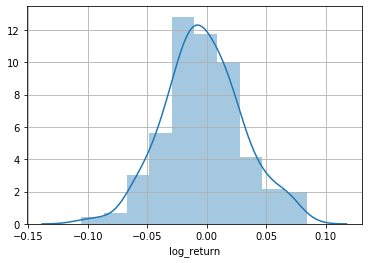

In [180]:
import seaborn as sns
plt.grid()
sns.distplot(sample['log_return'], bins=10)
plt.show()

**1.  Variance-Covariance approach for one asset**

In [181]:
stocks_stat = stocks_stat.dropna()

In [196]:
from scipy.stats import norm

confidence_lvl = [0.9, 0.95, 0.99]

VaR = {}

print('VaR for %s:' % chosen_asset)
for clvl in confidence_lvl:
    VaR[clvl] = -norm.ppf(1-clvl, sample['log_return'].mean(), sample['log_return'].std())
    print(' - Loss will not exceed %.4f  with %.2f%s confidence.' % (VaR[clvl], clvl, '%'))

VaR for 300373.SZ:
 - Loss will not exceed 0.0424  with 0.90% confidence.
 - Loss will not exceed 0.0536  with 0.95% confidence.
 - Loss will not exceed 0.0745  with 0.99% confidence.


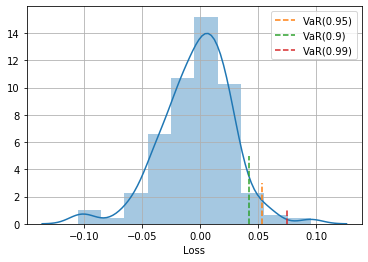

In [235]:
import seaborn as sns                                                           
plt.grid()


sns.distplot(sample['log_return'], bins=10)

# f = sns.distplot(-sample['log_return'], bins=10, kde=False, norm_hist=True)
# xx = np.arange(-0.2, +0.2, 0.001)                                                   
# yy = stats.norm.pdf(xx, stocks_stat.loc[chosen_asset]['E'],stocks_stat.loc[chosen_asset]['Sigma'])                                                         
# plt.plot(xx, yy, 'b')    

plt.plot([VaR[0.95],VaR[0.95]],[0,3], '--', label='VaR(0.95)')
plt.plot([VaR[0.9],VaR[0.9]],[0,5], '--', label='VaR(0.9)')
plt.plot([VaR[0.99],VaR[0.99]],[0,1], '--', label='VaR(0.99)')
plt.legend()
plt.xlabel('Loss')
plt.show()

**Комментарий**: 
1. Итак, видим, что для того, чтобы рассчитать VaR методом Variance-Covariance достаточно использовать point percentile function (ppf) нормального распределения, которая посчитая нам по заданной вероятности точку на оси абсцисс графика нормального распределения с заданными средним и дисперсией (полученными по выборке).
2. Более подробное объяснение есть в [Методы-и-алгоритмы-финансовой-математики](https://vk.com/doc136761433_569070591?hash=bfb7543c4fc46de90d&dl=8a67bf04c0efe170cd) на стр. **599**

In [236]:
# посчитаем VaR для всех активов (данным методом), предполагая, что они нормально распределены

for symbol in symbols:
    sample = stocks[symbol]
    for clvl in confidence_lvl:
        stocks_stat.at[symbol, 'VaR_'+str(clvl)] = -norm.ppf(1-clvl, 
                                                                sample['log_return'].mean(), 
                                                                sample['log_return'].std())

In [242]:
# получим самые привлекательные активы, основываясь на VaR (у них наименьшие предполагаемые потери)

stocks_stat.dropna().sort_values(['VaR_0.95'], ascending=[True]).head(5)

,symbol,E,Sigma,mean_vol,mean_return,mean_log_return,VaR_0.9,VaR_0.95,VaR_0.99
300280.SZ,300280.SZ,-0.000439,0.008827,4.848308e+05,0.999601,-0.000439,0.011775,0.014988,0.021016
000534.SZ,000534.SZ,-0.001189,0.010182,7.288091e+05,0.998864,-0.001189,0.014265,0.017972,0.024925
600811.SS,600811.SS,-0.000980,0.010510,7.993391e+06,0.999075,-0.000980,0.014477,0.018303,0.025481
600900.SS,600900.SS,0.000063,0.011302,1.843271e+07,1.000127,0.000063,0.014451,0.018566,0.026285
002412.SZ,002412.SZ,-0.000872,0.010890,1.583296e+06,0.999187,-0.000872,0.014858,0.018823,0.026260


**2. Historical Simulation approach**

подход заключается в следующем: 
 1. Вычисляем доходности 
 2. Сортируем доходности от худшего к лучшему
 3. Вычисляем кумулятивную функцию
  <br> *=>* VaR с 90% уровнем это 10%


In [244]:
# chosen_asset = 'Ping An Insurance'
sample = stocks[chosen_asset]
sample = sample.sort_values(['log_return'], ascending=[True]).dropna()

In [247]:
print('VaR for %s:' % chosen_asset)
for clvl in confidence_lvl:
    VaR[clvl] = -sample.log_return.quantile(1-clvl)
    print(' - Loss will not exceed %.4f  with %.2f%s confidence.' % (VaR[clvl], clvl, '%'))

VaR for 300373.SZ:
 - Loss will not exceed 0.0428  with 0.90% confidence.
 - Loss will not exceed 0.0580  with 0.95% confidence.
 - Loss will not exceed 0.0796  with 0.99% confidence.


**Замечание**: 
    1. Как вы можете увидеть здесь есть значительная разница между посчитанными VaR по методу двум методам, это может говорить о том, что распределение не нормальное.

In [250]:
# посчитаем VaR для всех активов (данным методом)

for symbol in symbols:
    sample = stocks[symbol]
    sample = sample.sort_values(['log_return'], ascending=[True]).dropna()
    for clvl in confidence_lvl:
        stocks_stat.at[symbol, 'qVaR_'+str(clvl)] = -sample.log_return.quantile(1-clvl)

In [254]:
stocks_stat.dropna(inplace=True)
stocks_stat.sort_values(['qVaR_0.95'], ascending=[True]).head(15)

,symbol,E,Sigma,mean_vol,mean_return,mean_log_return,VaR_0.9,VaR_0.95,VaR_0.99,qVaR_0.9,qVaR_0.95,qVaR_0.99
000912.SZ,000912.SZ,-0.000755,0.011513,5.451515e+05,0.999311,-0.000755,0.015540,0.019732,0.027594,-0.000000,-0.000000,0.051387
600399.SS,600399.SS,-0.003587,0.056965,1.306536e+06,0.997654,-0.003587,0.076742,0.097480,0.136382,-0.000000,-0.000000,0.014693
002252.SZ,002252.SZ,-0.003729,0.023709,6.288275e+06,0.996552,-0.003729,0.034177,0.042809,0.059000,0.001018,0.008074,0.105565
300280.SZ,300280.SZ,-0.000439,0.008827,4.848308e+05,0.999601,-0.000439,0.011775,0.014988,0.021016,0.005873,0.009599,0.016540
300087.SZ,300087.SZ,-0.000280,0.011972,1.271574e+06,0.999791,-0.000280,0.015655,0.020014,0.028190,0.010509,0.013916,0.028766
603158.SS,603158.SS,-0.000503,0.014256,5.422557e+05,0.999598,-0.000503,0.018811,0.024001,0.033737,0.011275,0.014997,0.042709
000534.SZ,000534.SZ,-0.001189,0.010182,7.288091e+05,0.998864,-0.001189,0.014265,0.017972,0.024925,0.009855,0.016064,0.035138
002739.SZ,002739.SZ,-0.001914,0.016524,3.068663e+06,0.998221,-0.001914,0.023134,0.029150,0.040434,-0.000000,0.016091,0.105384
600811.SS,600811.SS,-0.000980,0.010510,7.993391e+06,0.999075,-0.000980,0.014477,0.018303,0.025481,0.009534,0.016197,0.042329
600642.SS,600642.SS,-0.000791,0.011415,8.053353e+06,0.999274,-0.000791,0.015451,0.019607,0.027402,0.010651,0.016752,0.039016


**Комментарий**:
- заметим, что наилучшей метрикой VaR при уровне доверия 95% обладают активы *000912.SZ* и *600399.SS*. Отобразим их на карте активов:

In [270]:
fig = px.scatter(stocks_stat, x="Sigma", y="E", hover_data=["symbol"], title="Mean-Variance map", size="mean_vol")

best_VaR = ['000912.SZ', '600399.SS']

for symbol in best_VaR[::-1]:
    fig.add_trace(go.Scatter(
        x=[stocks_stat.loc[symbol].Sigma],
        y=[stocks_stat.loc[symbol].E],
        mode="markers+text",
        textposition="top center",
        name=symbol,
        text=symbol,
        marker=dict(
            size=20)
    ))

fig.data = (fig.data[1],fig.data[2],fig.data[0])
fig.show()

#### Характеристика VaR для портфеля с равными долями и индекса рынка

Сбалансированный портфель:

In [306]:
print('VaR for balanced portfolio')
for clvl in confidence_lvl:
    VaR[clvl] = -norm.ppf(1-clvl, E_balanced, sigma_balanced)
    print(' - Loss will not exceed %.4f  with %.2f%s confidence.' % (VaR[clvl], clvl, '%'))

VaR for balanced portfolio
 - Loss will not exceed 0.0039  with 0.90% confidence.
 - Loss will not exceed 0.0046  with 0.95% confidence.
 - Loss will not exceed 0.0057  with 0.99% confidence.


In [307]:
# cov_matrix = returns.cov()
# sse_symbols = list(pd.read_csv('data/SSE50.csv',names=['Name', 'Industry','Symbol'])['Symbol'])
# sse_symbols = [s+'.ss' for s in sse_symbols[1:]]
# cov_matrix = log_returns.cov()
# x = [1/len(log_returns.columns) for i in range(len(log_returns.columns))]
# x = np.array(x)

# avg_rets = log_returns.mean()

# port_mean = avg_rets.dot(x)
 
# port_stdev = np.sqrt(x.T.dot(cov_matrix).dot(x))